In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.utils import resample
drive.mount('/content/drive')

Mounted at /content/drive


Загрузим наши датафреймы.

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ga_hits.csv')

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/ga_sessions.csv', low_memory=False)
df1

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


## Data Cleaning

In [4]:
# Оставим в датасете необходимые столбцы и удалим дубликаты
df = df[['session_id', 'event_action']]
df.drop_duplicates(subset='session_id', keep='first', inplace=True)
df

,session_id,event_action
0,5639623078712724064.1640254056.1640254056,quiz_show
1,7750352294969115059.1640271109.1640271109,quiz_show
2,885342191847998240.1640235807.1640235807,quiz_show
3,142526202120934167.1640211014.1640211014,quiz_show
4,3450086108837475701.1640265078.1640265078,quiz_show
...,...,...
15726424,1706097853564481669.1640267190.1640267190,quiz_show
15726425,8262758806963127884.1640272536.1640272536,quiz_show
15726426,3349670872968620291.1640264206.1640264206,quiz_show
15726431,1009509786569589790.1640244938.1640244938,quiz_show


In [5]:
# Проверим наличие дубликатов в session_id
df1.duplicated(subset='session_id').sum()

0

In [6]:
# Объединим датафереймы
df1 = df1.merge(df, how='left', on='session_id')
df1

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,sub_landing
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,sub_landing
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,search_form_region
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,sub_landing
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,quiz_show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow,sub_landing
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,sub_landing
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,view_card
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,sub_landing


<Axes: >

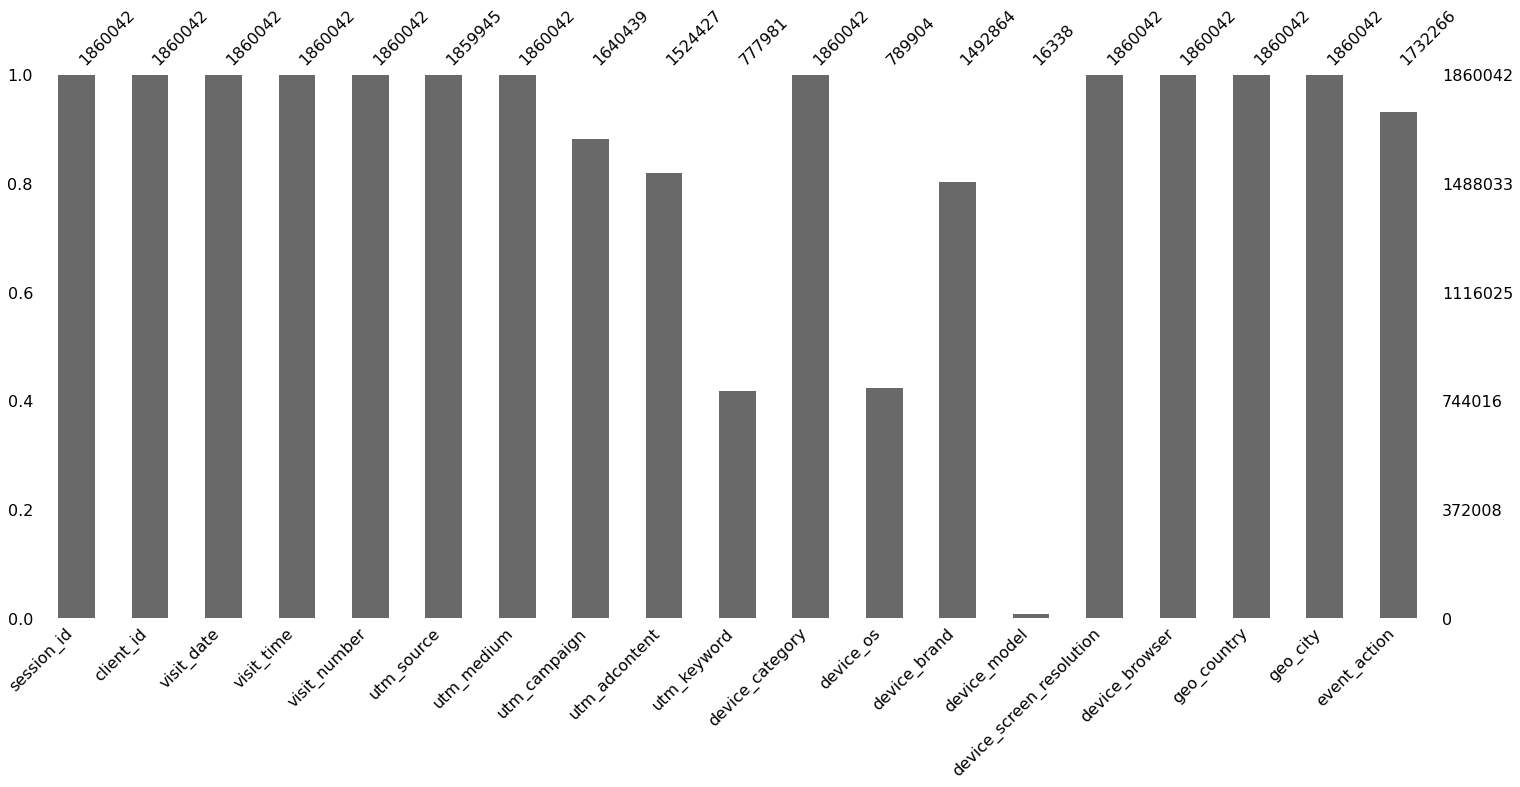

In [7]:
#Посмотрим изображение, на котором отображаются наиболее проседающие по не заполненным значениям признаки.
msno.bar(df1)

In [8]:
# Посмотрим процент пропущенных значений по каждой колонке
missing_values = ((df1.isna().sum() / len(df1)) * 100).sort_values()
missing_values

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_medium                   0.000000
geo_country                  0.000000
device_browser               0.000000
geo_city                     0.000000
device_category              0.000000
device_screen_resolution     0.000000
utm_source                   0.005215
event_action                 6.869522
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [9]:
# Удалим неинформативные столбцы из датасета, превыщающие порог в 55%
df1 = df1.drop(columns=['device_os', 'utm_keyword', 'device_model'], axis=1)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860042 entries, 0 to 1860041
Data columns (total 16 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   device_category           object
 10  device_brand              object
 11  device_screen_resolution  object
 12  device_browser            object
 13  geo_country               object
 14  geo_city                  object
 15  event_action              object
dtypes: int64(1), object(15)
memory usage: 241.2+ MB


In [11]:
# Посчитаем количество пропущенных значений в столбцах
df1.isnull().sum()

session_id                       0
client_id                        0
visit_date                       0
visit_time                       0
visit_number                     0
utm_source                      97
utm_medium                       0
utm_campaign                219603
utm_adcontent               335615
device_category                  0
device_brand                367178
device_screen_resolution         0
device_browser                   0
geo_country                      0
geo_city                         0
event_action                127776
dtype: int64

In [12]:
# Заполним пропуски значением 'other'
df1.utm_source = df1.utm_source.fillna('Other')
df1.utm_campaign = df1.utm_campaign.fillna('Other')
df1.utm_adcontent = df1.utm_adcontent.fillna('Other')
df1.device_brand = df1.device_brand.fillna('Other')

## Feature engineering

### Add new columns

In [13]:
# Напишем функцию, где целевые действия заменяем на 1, а остальные на 0
def target_change(y):
  target = ['sub_car_claim_click', 
            'sub_car_claim_submit_click', 
            'sub_open_dialog_click', 
            'sub_open_dialog_click', 
            'sub_custom_question_submit_click',
            'sub_submit_success',
            'sub_car_request_submit_click'
  ]
  if y in target:
    return 1
  return 0  
df1['event_action'] = df1['event_action'].apply(target_change)

In [14]:
# Удалим строки с Nan
df1 = df1.dropna()
df1

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,Other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,Other,Other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,Other,Other,desktop,Other,1920x1080,Chrome,Russia,Moscow,0
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,0
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,0
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [15]:
# Посмотрим на распределение классов
df1.event_action.value_counts()

0    1855327
1       4715
Name: event_action, dtype: int64

 В датасете явный дисбаланс классов, необходимо будет учитывать данный факт при обучении модели.

In [15]:
# Напишем функцию и добавим новый столбец в наш датафрейм(согласно данным из методички)
def organic_add(y):
      organic = ['organic', 'referral', '(none)'] 
      if y in organic:
        return 1
      return 0  
df1['organic_traffic'] = df1['utm_medium'].apply(organic_add)        

In [16]:
# Напишем функцию и добавим новый столбец в наш датафрейм(согласно данным из методички)
def paid_add(y):
      paid = ['organic', 'referral', '(none)'] 
      if y in paid:
        return 0
      return 1  
df1['paid_traffic'] = df1['utm_medium'].apply(paid_add)  

In [17]:
# Преобразуем "visit_date" в числовые значения
df1["visit_date"] = pd.to_datetime(df1["visit_date"])
df1['date_month'] = df1['visit_date'].apply(lambda x: x.month)
df1['date_day'] = df1['visit_date'].apply(lambda x: x.day)

In [18]:
# Разделим столбец device_screen_resolution на 2 столбца
split_df1 = df1['device_screen_resolution'].str.split('x',expand=True)
split_df1.columns=['screen_height','screen_width']
split_df1 = split_df1.dropna()
split_df1 = split_df1.astype(int)

In [19]:
df1 = df1.join(split_df1)

In [21]:
df1

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_browser,geo_country,geo_city,event_action,organic_traffic,paid_traffic,date_month,date_day,screen_height,screen_width
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Zlatoust,0,0,1,11,24,360.0,720.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,Samsung Internet,Russia,Moscow,0,0,1,11,14,385.0,854.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,Chrome,Russia,Krasnoyarsk,0,0,1,12,28,360.0,720.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,Other,NOBKLgtuvqYWkXQHeYWM,mobile,...,Chrome,Russia,Moscow,0,0,1,5,29,393.0,786.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,Other,Other,mobile,...,Chrome,Russia,Moscow,0,0,1,5,29,393.0,786.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,Other,Other,desktop,...,Chrome,Russia,Moscow,0,0,1,12,22,1920.0,1080.0
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Safari,Russia,Stavropol,0,1,0,5,26,390.0,844.0
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,...,Safari,Russia,Moscow,0,1,0,11,15,375.0,667.0
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,...,Chrome,Russia,Chelyabinsk,0,0,1,11,29,393.0,851.0


In [20]:
# Удалим столбцы, которые заменили новые, а также столбцы с ID.
df1 = df1.drop(columns=['session_id', 'client_id', 'visit_date', 'visit_time', 'device_screen_resolution'], axis=1)

### Standardization of data

In [21]:
#Создадим объект класса StandardScaler для последующей работы
std_scaler = StandardScaler()
std_scaler.fit(df1[['visit_number']])
std_scaler_visit = std_scaler.transform(df1[['visit_number']])

In [22]:
df1[['visit_number']] = std_scaler_visit

In [23]:
std_scaler.fit(df1[['date_month', 'date_day']])
std_scaler_date = std_scaler.transform(df1[['date_month', 'date_day']])

In [24]:
df1[['date_month', 'date_day']] = std_scaler_date

In [25]:
std_scaler.fit(df1[['screen_height','screen_width']])
std_scaler_screen = std_scaler.transform(df1[['screen_height','screen_width']])
df1[['screen_height','screen_width']] = std_scaler_screen

In [28]:
df1.dtypes

visit_number       float64
utm_source          object
utm_medium          object
utm_campaign        object
utm_adcontent       object
device_category     object
device_brand        object
device_browser      object
geo_country         object
geo_city            object
event_action         int64
organic_traffic      int64
paid_traffic         int64
date_month         float64
date_day           float64
screen_height      float64
screen_width       float64
dtype: object

In [29]:
df1

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,event_action,organic_traffic,paid_traffic,date_month,date_day,screen_height,screen_width
0,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Zlatoust,0,0,1,0.760687,0.801436,-0.536398,-0.623178
1,-0.144796,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,0,0,1,0.760687,-0.336427,-0.491202,0.067673
2,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,0,0,1,1.215280,1.256581,-0.536398,-0.623178
3,-0.144796,kjsLglQLzykiRbcDiGcD,cpc,Other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,Russia,Moscow,0,0,1,-1.966869,1.370368,-0.476739,-0.282908
4,-0.060259,kjsLglQLzykiRbcDiGcD,cpc,Other,Other,mobile,Xiaomi,Chrome,Russia,Moscow,0,0,1,-1.966869,1.370368,-0.476739,-0.282908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,-0.144796,BHcvLfOaCWvWTykYqHVe,cpc,Other,Other,desktop,Other,Chrome,Russia,Moscow,0,0,1,1.215280,0.573863,2.283839,1.232840
1860038,-0.144796,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Stavropol,0,1,0,-1.966869,1.029009,-0.482163,0.016117
1860039,-0.144796,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Moscow,0,1,0,0.760687,-0.222641,-0.509281,-0.896425
1860040,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,Chrome,Russia,Chelyabinsk,0,0,1,0.760687,1.370368,-0.476739,0.052207


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860042 entries, 0 to 1860041
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   visit_number     float64
 1   utm_source       object 
 2   utm_medium       object 
 3   utm_campaign     object 
 4   utm_adcontent    object 
 5   device_category  object 
 6   device_brand     object 
 7   device_browser   object 
 8   geo_country      object 
 9   geo_city         object 
 10  event_action     int64  
 11  organic_traffic  int64  
 12  paid_traffic     int64  
 13  date_month       float64
 14  date_day         float64
 15  screen_height    float64
 16  screen_width     float64
dtypes: float64(5), int64(3), object(9)
memory usage: 319.9+ MB


### Transformation of categorical variables

In [26]:
#Создадим объект класса OneHotEncoder для последующей работы
ohe = OneHotEncoder(drop='first', sparse_output=False, min_frequency=7000)

In [27]:
ohe.fit(df1.select_dtypes(include='object'))

OneHotEncoder(drop='first', min_frequency=7000, sparse_output=False)

In [28]:
ohe_obj = ohe.transform(df1.select_dtypes(include='object'))

In [29]:
df1[ohe.get_feature_names_out()] = ohe_obj
df1

<ipython-input-29-4af5e78967fd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe_obj
<ipython-input-29-4af5e78967fd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[ohe.get_feature_names_out()] = ohe_obj
<ipython-input-29-4af5e78967fd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,...,geo_city_Saratov,geo_city_Sochi,geo_city_Tula,geo_city_Tyumen,geo_city_Ufa,geo_city_Vladivostok,geo_city_Voronezh,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_infrequent_sklearn
0,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Zlatoust,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.144796,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.144796,kjsLglQLzykiRbcDiGcD,cpc,Other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.060259,kjsLglQLzykiRbcDiGcD,cpc,Other,Other,mobile,Xiaomi,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,-0.144796,BHcvLfOaCWvWTykYqHVe,cpc,Other,Other,desktop,Other,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1860038,-0.144796,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Stavropol,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1860039,-0.144796,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1860040,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,Chrome,Russia,Chelyabinsk,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Balance for dataset

In [30]:
# Применим Downsample для нашего датасета
df_min = df1[df1['event_action'] == 1]
df_maj = df1[df1['event_action'] == 0]
df_maj_downsample = resample(df_maj, replace=False, n_samples=len(df_min), random_state=42)
print(df_maj_downsample.shape)
print(df_min.shape)


(4715, 133)
(4715, 133)


In [31]:
df3 = pd.concat([df_maj_downsample, df_min], ignore_index=True).sample(frac=1.)
df3

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,...,geo_city_Saratov,geo_city_Sochi,geo_city_Tula,geo_city_Tyumen,geo_city_Ufa,geo_city_Vladivostok,geo_city_Voronezh,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_infrequent_sklearn
3900,-0.144796,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,OPPO,Chrome,Russia,Saint Petersburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4818,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Saint Petersburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1922,-0.144796,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2869,-0.144796,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7495,-0.144796,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Vertex,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,-0.144796,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,mobile,Xiaomi,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8925,-0.144796,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,Safari,Russia,Naberezhnye Chelny,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7032,0.024279,bByPQxmDaMXgpHeypKSM,referral,hkvDVxqLOzGjGaoNiNzN,XSkXBCPfnJjvxbfeewtd,desktop,Other,Safari,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5841,-0.060259,bByPQxmDaMXgpHeypKSM,referral,nSReTmyFtbSjlPrTKoaX,JNHcPlZPxEMWDnRiyoBf,desktop,Other,Chrome,Russia,Moscow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

### Train_test

In [32]:
# Разделим наш датафрейм на тренировочную и тестовую выборку
x = df3.drop(['event_action', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_category', 'device_brand', 'device_browser', 'geo_country', 'geo_city'], axis=1)
y = df3['event_action']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### LogisticRegression

In [57]:
# Обучим наши данные с помощью логистической модели
lr = LogisticRegression(C=1, max_iter=1000)

In [58]:
lr.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [59]:
pred = lr.predict(x_test)

In [60]:
pred_y = lr.predict_proba(x_test)[:,1]

In [37]:
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[758 646]
 [501 924]]


### ROC_AUC

In [61]:
logit_roc_auc = roc_auc_score(y_test, pred_y)
print('ROC_AUC:', logit_roc_auc)

ROC_AUC: 0.6511351027140501


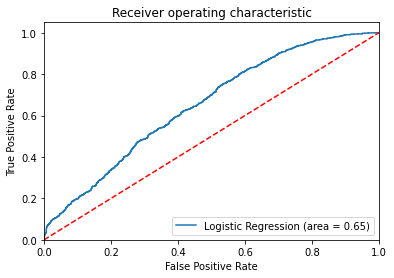

In [62]:
# Постороим график
logit_roc_auc = roc_auc_score(y_test, pred_y)
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Таким образом удалось обучить модель с вероятностью предсказания целевого действия 0,65.

